In [1]:
import pathview
import json
from pathsim.blocks import Scope
import matplotlib.pyplot as plt
import pandas as pd

# read graph data from a JSON file
with open("arc_same_as_meschini.json", "r") as f:
    graph_data = json.load(f)

model, duration = pathview.make_pathsim_model(graph_data)

model.run(50 * 24 * 3600)


14:43:21 - INFO - LOGGING (log: True)
14:43:21 - INFO - BLOCKS (total: 20, dynamic: 10, static: 10, eventful: 1)
14:43:21 - INFO - GRAPH (nodes: 20, edges: 33, alg. depth: 2, loop depth: 0, runtime: 0.048ms)
14:43:21 - INFO - STARTING -> TRANSIENT (Duration: 4320000.00s)
14:43:21 - INFO - --------------------   1% | 0.1s<10.3s | 2191.1 it/s
14:43:22 - INFO - ##------------------  11% | 1.1s<12.8s | 2015.7 it/s
14:43:23 - INFO - ####----------------  20% | 1.9s<7.0s | 2456.0 it/s
14:43:24 - INFO - ######--------------  30% | 2.9s<3.8s | 2442.7 it/s
14:43:25 - INFO - ########------------  40% | 3.8s<5.8s | 2268.4 it/s
14:43:26 - INFO - ##########----------  50% | 4.8s<2.8s | 2424.1 it/s
14:43:27 - INFO - ############--------  60% | 5.7s<4.9s | 2335.9 it/s
14:43:28 - INFO - ##############------  71% | 6.7s<2.7s | 2570.3 it/s
14:43:29 - INFO - ################----  80% | 7.5s<1.8s | 2420.2 it/s
14:43:30 - INFO - ##################--  90% | 8.5s<1.1s | 2435.0 it/s
14:43:31 - INFO - ########

{'total_steps': 21604,
 'successful_steps': 21604,
 'runtime_ms': 9374.52585902065}

In [2]:
# read data from a url
url = "https://raw.githubusercontent.com/SamueleMeschini/fuel-cycle/refs/heads/main/postprocessing/data/inventory_evolution_tbz1h.csv"
data_meschini = pd.read_csv(url)
data_meschini

,time [s],blanket inventory [kg],TES inventory [kg],ISS inventory [kg],storage inventory [kg],Unnamed: 5,Unnamed: 6,Unnamed: 7
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.140000,NaN,NaN,NaN
1,1.000000e-04,9.590000e-11,1.070000e-18,2.380000e-24,1.140000,NaN,NaN,NaN
2,6.000000e-04,5.760000e-10,3.840000e-17,5.140000e-22,1.140000,NaN,NaN,NaN
3,3.100000e-03,2.970000e-09,1.020000e-15,7.090000e-20,1.140000,NaN,NaN,NaN
4,1.560000e-02,1.500000e-08,2.590000e-14,9.030000e-18,1.139999,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
577783,9.460761e+07,3.282300e-03,6.162572e-02,2.588897e-01,3.509977,NaN,NaN,NaN
577784,9.460761e+07,3.281900e-03,6.162573e-02,2.588901e-01,3.509996,NaN,NaN,NaN
577785,9.460776e+07,3.181202e-03,6.162642e-02,2.589760e-01,3.514562,NaN,NaN,NaN
577786,9.460782e+07,3.141250e-03,6.162576e-02,2.590037e-01,3.516333,NaN,NaN,NaN


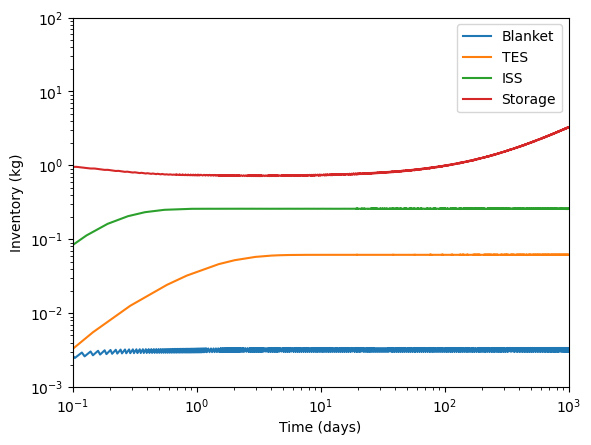

In [3]:
time_days = data_meschini["time [s]"] / 3600 / 24
plt.plot(time_days, data_meschini["blanket inventory [kg]"], label="Blanket")
plt.plot(time_days, data_meschini["TES inventory [kg]"], label="TES")
plt.plot(time_days, data_meschini["ISS inventory [kg]"], label="ISS")
plt.plot(time_days, data_meschini["storage inventory [kg]"], label="Storage")

plt.xscale("log")
plt.yscale("log")
plt.ylim(1e-3, 1e2)
plt.xlim(1e-1, 1e3)
plt.xlabel("Time (days)")
plt.ylabel("Inventory (kg)")
plt.legend()

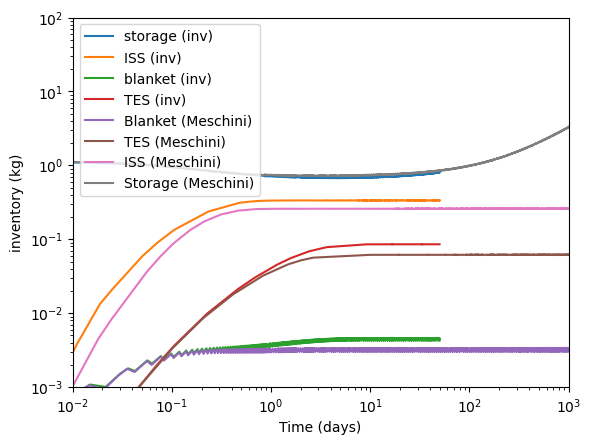

In [6]:
scopes = [block for block in model.blocks if isinstance(block, Scope)]

for i, scope in enumerate(scopes):
    sim_time, data = scope.read()
    for p, d in enumerate(data):
        lb = scope.labels[p] if p < len(scope.labels) else f"port {p}"
        if any([kw in lb.lower() for kw in ["blanket", "tes", "iss", "storage"]]):
            plt.plot(sim_time / 3600 / 24, d, label=lb)

    plt.xlabel("Time (days)")
    plt.ylabel("inventory (kg)")
    plt.yscale("log")
    plt.xscale("log")
plt.ylim(1e-3, 1e2)
plt.xlim(1e-2, 1e3)
plt.plot(time_days, data_meschini["blanket inventory [kg]"], label="Blanket (Meschini)")
plt.plot(time_days, data_meschini["TES inventory [kg]"], label="TES (Meschini)")
plt.plot(time_days, data_meschini["ISS inventory [kg]"], label="ISS (Meschini)")
plt.plot(time_days, data_meschini["storage inventory [kg]"], label="Storage (Meschini)")

plt.legend()
